## UK-Energy-Analysis-2021


In [763]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [764]:
df = pd.read_excel('2020_Primary_Energy_Tables_-_web_copy.xlsx', sheet_name = 'Table P2', header=4)

#### DATA CLEANSING

In [765]:
df.head()

,Unnamed: 0,Solid Fuel,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Petroleum,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,Total,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,NaN,Industry,Transport,Domestic,Services,Total,NaN,Industry,Transport,Domestic,...,Total,NaN,Industry,Transport,Domestic,Services,Total,NaN,NaN,NaN
1,1970.0,45572.665524,899.312117,38261.973109,14260.04925,98994,NaN,37757.668562,31514.548421,9797.975843,...,7435,NaN,88958.95462,32521.609772,58015.427211,30598.706032,210094.697637,NaN,NaN,NaN
2,1971.0,40284.458881,745.04712,34486.109199,12216.384799,87732,NaN,37249.992633,31998.035088,10647.946763,...,7672,NaN,86599.128397,32858.473657,58028.689811,29680.222566,207166.514431,NaN,NaN,NaN
3,1972.0,34345.42975,583.976848,31164.66392,10752.929483,76847.0,NaN,38943.883605,33013.54145,13425.719996,...,8202.535056,NaN,86511.860267,33725.804826,60633.221105,30245.228981,211116.115179,NaN,NaN,NaN
4,1973.0,37748.266162,596.856669,33028.197969,11861.6792,83235,NaN,38626.321905,35424.770642,12826.37742,...,7796.587417,NaN,91418.720807,36121.883574,61898.857647,31066.733399,220506.195427,NaN,NaN,NaN


In [766]:
df = df.dropna(axis=1, how='all')
df = df.dropna()
df.head()

,Unnamed: 0,Solid Fuel,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Petroleum,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Electricity3,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Total,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
1,1970.0,45572.665524,899.312117,38261.973109,14260.04925,98994,37757.668562,31514.548421,9797.975843,13295.504811,...,2820.373897,106.522488,2976.337202,1531.766413,7435,88958.95462,32521.609772,58015.427211,30598.706032,210094.697637
2,1971.0,40284.458881,745.04712,34486.109199,12216.384799,87732,37249.992633,31998.035088,10647.946763,13646.539946,...,2845.504729,106.824746,3126.76482,1592.905705,7672,86599.128397,32858.473657,58028.689811,29680.222566,207166.514431
3,1972.0,34345.42975,583.976848,31164.66392,10752.929483,76847.0,38943.883605,33013.54145,13425.719996,14828.435071,...,2925.425154,106.472085,3473.593663,1697.044153,8202.535056,86511.860267,33725.804826,60633.221105,30245.228981,211116.115179
4,1973.0,37748.266162,596.856669,33028.197969,11861.6792,83235,38626.321905,35424.770642,12826.37742,14623.138043,...,2840.223727,92.418669,3238.366653,1625.578368,7796.587417,91418.720807,36121.883574,61898.857647,31066.733399,220506.195427
5,1974.0,32205.737102,551.822707,30419.354064,10101.086126,73278.0,34361.77116,34036.213653,12782.441195,13147.051375,...,3311.044999,118.886686,4045.703748,1850.364567,9326,84175.679293,34739.679829,62528.36692,28947.751341,210391.477383


In [767]:
df = df.astype(int)

In [768]:
df.head()

,Unnamed: 0,Solid Fuel,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Petroleum,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Electricity3,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Total,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
1,1970,45572,899,38261,14260,98994,37757,31514,9797,13295,...,2820,106,2976,1531,7435,88958,32521,58015,30598,210094
2,1971,40284,745,34486,12216,87732,37249,31998,10647,13646,...,2845,106,3126,1592,7672,86599,32858,58028,29680,207166
3,1972,34345,583,31164,10752,76847,38943,33013,13425,14828,...,2925,106,3473,1697,8202,86511,33725,60633,30245,211116
4,1973,37748,596,33028,11861,83235,38626,35424,12826,14623,...,2840,92,3238,1625,7796,91418,36121,61898,31066,220506
5,1974,32205,551,30419,10101,73278,34361,34036,12782,13147,...,3311,118,4045,1850,9326,84175,34739,62528,28947,210391


In [769]:
years_column = df['Unnamed: 0']
df_years = pd.DataFrame()
df_years = years_column.copy()
df_years.head()

1    1970
2    1971
3    1972
4    1973
5    1974
Name: Unnamed: 0, dtype: int64

In [770]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Solid Fuel,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Petroleum,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Electricity3,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Total,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
1,45572,899,38261,14260,98994,37757,31514,9797,13295,92365,...,2820,106,2976,1531,7435,88958,32521,58015,30598,210094
2,40284,745,34486,12216,87732,37249,31998,10647,13646,93542,...,2845,106,3126,1592,7672,86599,32858,58028,29680,207166
3,34345,583,31164,10752,76847,38943,33013,13425,14828,100211,...,2925,106,3473,1697,8202,86511,33725,60633,30245,211116
4,37748,596,33028,11861,83235,38626,35424,12826,14623,101500,...,2840,92,3238,1625,7796,91418,36121,61898,31066,220506
5,32205,551,30419,10101,73278,34361,34036,12782,13147,94327,...,3311,118,4045,1850,9326,84175,34739,62528,28947,210391


In [771]:
df_fuel = pd.DataFrame()
df_pet = pd.DataFrame()
df_gas = pd.DataFrame()
df_bio = pd.DataFrame()
df_elec = pd.DataFrame()
df_total = pd.DataFrame()

In [772]:
count = 0
def split_dataframe(data, datasplit):
    global count
    datasplit = data.iloc[:,count:count+5]
    count+=5
    return datasplit

In [773]:
df_fuel = split_dataframe(df,df_fuel)
df_fuel = pd.concat([df_years, df_fuel], axis="columns")
df_fuel.columns = ['Year','Industry', 'Transport', 'Domestic', 'Services','Total']
df_fuel.head()

,Year,Industry,Transport,Domestic,Services,Total
1,1970,45572,899,38261,14260,98994
2,1971,40284,745,34486,12216,87732
3,1972,34345,583,31164,10752,76847
4,1973,37748,596,33028,11861,83235
5,1974,32205,551,30419,10101,73278


In [774]:
df_pet = split_dataframe(df,df_pet)
df_pet = pd.concat([df_years, df_pet], axis="columns")
df_pet.columns = ['Year','Industry', 'Transport', 'Domestic', 'Services','Total']
df_pet.head()

,Year,Industry,Transport,Domestic,Services,Total
1,1970,37757,31514,9797,13295,92365
2,1971,37249,31998,10647,13646,93542
3,1972,38943,33013,13425,14828,100211
4,1973,38626,35424,12826,14623,101500
5,1974,34361,34036,12782,13147,94327


In [775]:
df_gas = split_dataframe(df,df_gas)
df_gas = pd.concat([df_years, df_gas], axis="columns")
df_gas.columns = ['Year','Industry', 'Transport', 'Domestic', 'Services','Total']
df_gas.head()

,Year,Industry,Transport,Domestic,Services,Total
1,1970,2808,1,6979,1511,11300
2,1971,6219,8,9767,2224,18220
3,1972,10297,21,12569,2966,25854
4,1973,12203,7,12805,2956,27973
5,1974,14297,32,15280,3849,33460


In [776]:
df_bio = split_dataframe(df,df_bio)
df_bio= pd.concat([df_years, df_bio], axis="columns")
df_bio.columns = ['Year','Industry', 'Transport', 'Domestic', 'Services','Total']
df_bio.head()

,Year,Industry,Transport,Domestic,Services,Total
1,1970,0,0,0,0,0
2,1971,0,0,0,0,0
3,1972,0,0,0,0,0
4,1973,0,0,0,0,0
5,1974,0,0,0,0,0


In [777]:
df_elec = split_dataframe(df,df_elec)
df_elec = pd.concat([df_years, df_elec], axis="columns")
df_elec.columns = ['Year','Industry', 'Transport', 'Domestic', 'Services','Total']
df_elec.head()

,Year,Industry,Transport,Domestic,Services,Total
1,1970,2820,106,2976,1531,7435
2,1971,2845,106,3126,1592,7672
3,1972,2925,106,3473,1697,8202
4,1973,2840,92,3238,1625,7796
5,1974,3311,118,4045,1850,9326


In [778]:
df_total = split_dataframe(df,df_total)
df_total = pd.concat([df_years, df_total], axis="columns")
df_total.columns = ['Year','Industry', 'Transport', 'Domestic', 'Services','Total']
df_total.head()

,Year,Industry,Transport,Domestic,Services,Total
1,1970,88958,32521,58015,30598,210094
2,1971,86599,32858,58028,29680,207166
3,1972,86511,33725,60633,30245,211116
4,1973,91418,36121,61898,31066,220506
5,1974,84175,34739,62528,28947,210391


Creating new data frames to observe the change in usage based on the first and last year in the dataset.

In [779]:
df_2019_fuel =df_fuel.iloc[[0, -1]]
df_2019_pet =df_pet.iloc[[0, -1]]
df_2019_gas =df_gas.iloc[[0, -1]]
df_2019_bio =df_bio.iloc[[0, -1]]
df_2019_elec =df_elec.iloc[[0, -1]]
df_2019_total = df_total.iloc[[0,-1]]

### DATA ANALYSING

#### CORRELATION

In [780]:
df_correlation = df_total.drop(['Year','Total'], axis =1) # Dropping the year and total column since it is irrelevant in correlation analysis
print(df_correlation.corr())

           Industry  Transport  Domestic  Services
Industry   1.000000  -0.830613 -0.197474 -0.644220
Transport -0.830613   1.000000  0.591186  0.901010
Domestic  -0.197474   0.591186  1.000000  0.775927
Services  -0.644220   0.901010  0.775927  1.000000


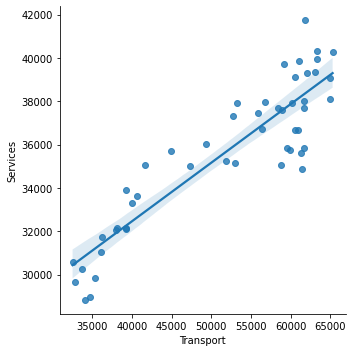

In [781]:
sns.lmplot(x="Transport", y= "Services", data = df_total)


It can be seen that there is a positive strong correlation between the sectors for total energy consumtion apart from the "Industry" sector where the correlation is negative.

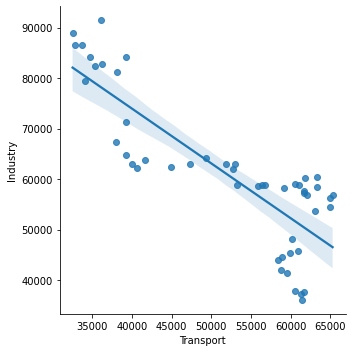

In [782]:
sns.lmplot(x="Transport", y= "Industry", data = df_total)

And there is a strong negative correlation between Industry and Transport. This can be explained by the decrease in total energy consumption in the Industry sector between 1970-2020.

#### GRAPHICS

<AxesSubplot:title={'center':'Solid Fuel Consumption'}, xlabel='Year', ylabel='ktoe'>

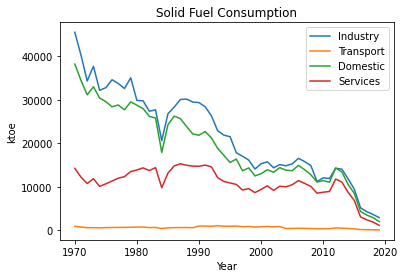

In [783]:
df_fuel.plot(x="Year", ylabel = 'ktoe', y = ["Industry","Transport","Domestic","Services"], title = "Solid Fuel Consumption")


<AxesSubplot:title={'center':'Petroleum Consumption'}, xlabel='Year', ylabel='ktoe'>

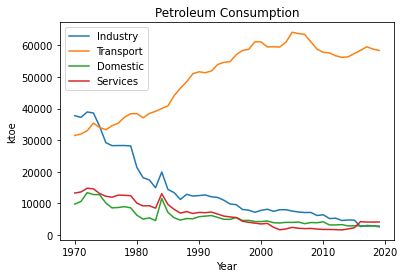

In [784]:
df_pet.plot(x="Year", ylabel = 'ktoe', y = ["Industry","Transport","Domestic","Services"], title = "Petroleum Consumption")

<AxesSubplot:title={'center':'Gas Consumption'}, xlabel='Year'>

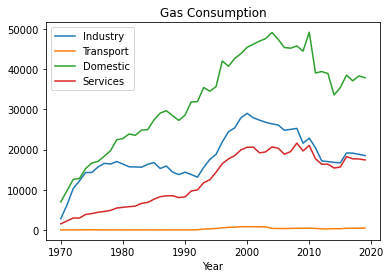

In [785]:
df_gas.plot(x="Year", y = ["Industry","Transport","Domestic","Services"], title = "Gas Consumption")

<AxesSubplot:title={'center':'Bioenergy and Waste'}, xlabel='Year', ylabel='ktoe'>

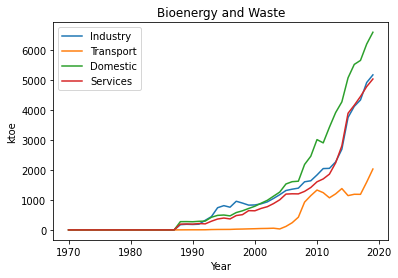

In [786]:
df_bio.plot(x="Year", ylabel = 'ktoe', y = ["Industry","Transport","Domestic","Services"], title = "Bioenergy and Waste")

<AxesSubplot:title={'center':'Electricity'}, xlabel='Year', ylabel='ktoe'>

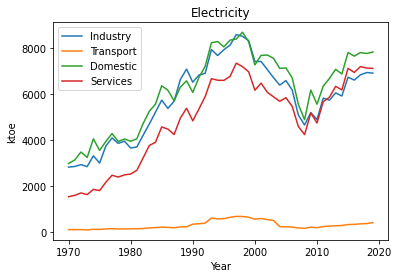

In [787]:
df_elec.plot(x="Year", ylabel = 'ktoe', y = ["Industry","Transport","Domestic","Services"], title = "Electricity")

<AxesSubplot:title={'center':'Total Energy Consumption'}, xlabel='Year', ylabel='ktoe'>

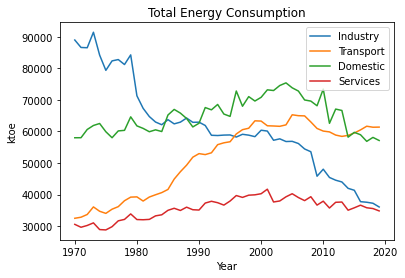

In [788]:
df_total.plot(x="Year", ylabel = 'ktoe', y = ["Industry","Transport","Domestic","Services"], title = "Total Energy Consumption")

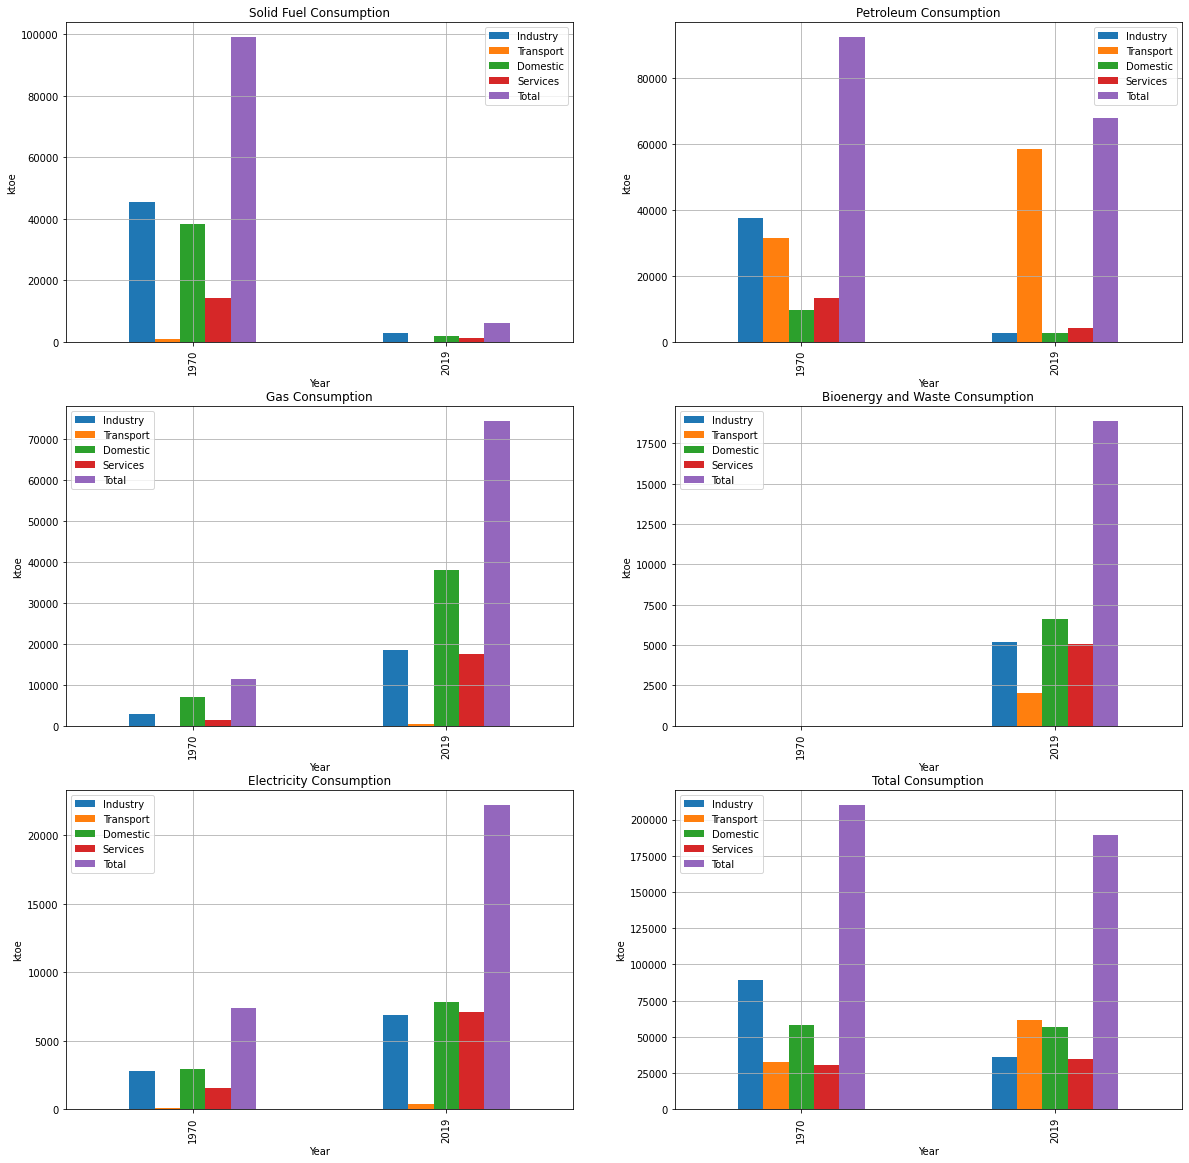

In [789]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize =(20,20))



df_2019_fuel.plot(ax=axes[0,0],x = "Year" , kind = 'bar', title = "Solid Fuel Consumption", grid = True, ylabel = 'ktoe')
df_2019_pet.plot(ax=axes[0,1],x = "Year" , kind = 'bar', title = "Petroleum Consumption", grid = True, ylabel = 'ktoe')
df_2019_gas.plot(ax=axes[1,0],x = "Year" , kind = 'bar', title = "Gas Consumption", grid = True, ylabel = 'ktoe')
df_2019_bio.plot(ax=axes[1,1],x = "Year" , kind = 'bar', title = "Bioenergy and Waste Consumption", grid = True, ylabel = 'ktoe')
df_2019_elec.plot(ax=axes[2,0],x = "Year" , kind = 'bar', title = "Electricity Consumption", grid = True, ylabel = 'ktoe')
df_2019_total.plot(ax=axes[2,1],x = "Year" , kind = 'bar', title = "Total Consumption", grid = True, ylabel = 'ktoe')




plt.show()

In [790]:
fuel_change = ((df_2019_fuel.iloc[1,5] - df_2019_fuel.iloc[0,5])/df_2019_fuel.iloc[0,5])*100
pet_change = ((df_2019_pet.iloc[1,5] - df_2019_pet.iloc[0,5])/df_2019_pet.iloc[0,5])*100
gas_change = ((df_2019_gas.iloc[1,5] - df_2019_gas.iloc[0,5])/df_2019_gas.iloc[0,5])*100
bio_change = 100 # Set this value to 100% since there was no bio energy in 1970
elec_change = ((df_2019_elec.iloc[1,5] - df_2019_elec.iloc[0,5])/df_2019_elec.iloc[0,5])*100
total_change = ((df_2019_total.iloc[1,5] - df_2019_total.iloc[0,5])/df_2019_total.iloc[0,5])*100


In [791]:

data = {'Percentage':[fuel_change,pet_change,gas_change,bio_change,elec_change,total_change]}
df_percentage=pd.DataFrame(data)
df_percentage.index = ["Solid Fuel", "Petroleum", "Gas", "Bio Energy and Waste", "Electricity", "Total"]
df_percentage = df_percentage["Percentage"].round(decimals=2)

In [792]:
df_percentage.head(6)

Solid Fuel              -93.82
Petroleum               -26.36
Gas                     557.11
Bio Energy and Waste    100.00
Electricity             198.94
Total                    -9.81
Name: Percentage, dtype: float64

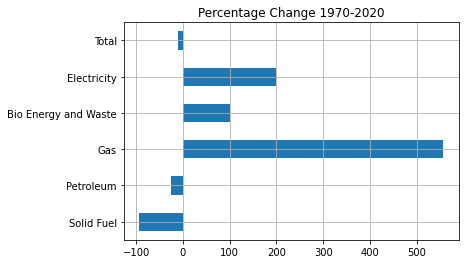

In [806]:
fig_p = df_percentage.plot(kind = "barh", grid=True, title = 'Percentage Change 1970-2020')

## Conclusion

In conclusion we can see that the most consumed type of energy in 2019 is "Gas" whereas the least consumed is "Solid Fuel". In 1970 we can see that the most used energy type was "Solid Fuel" and the least was “Bioenergy and Waste”. 

Most present consumption is from the “Transport” sector which is followed by domestic use. The Transport sector relies on Petroleum use whereas gas is the most domestically used energy type. An interesting finding is that the total energy consumption has decreased by 9.8%. This can be explained by the decrease in the usage of “Solid Fuel” and “Petroleum” usage which were the top supplies used in 1970. 